# Section 1: Comparative Analysis of Men's and Women's Perfume Markets
In this section, we will perform a comparative analysis of men's and women's perfume markets using the Perfume E-Commerce Dataset 2024. By examining key metrics such as pricing, sales, and brand representation, we aim to identify similarities, differences, and unique market dynamics between the two segments. This analysis will provide valuable insights into gender-specific preferences and help businesses tailor their strategies accordingly.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
# Load the men's and women's perfume datasets
mens_perfume_df = pd.read_csv('ebay_mens_perfume.csv')
womens_perfume_df = pd.read_csv('ebay_womens_perfume.csv')

In [41]:
mens_perfume_df.isnull().sum()
womens_perfume_df.isnull().sum()


brand                  1
title                  0
type                   2
price                  0
priceWithCurrency      0
available            131
availableText          8
sold                  16
lastUpdated           73
itemLocation           0
dtype: int64

In [42]:
# Drop rows with missing critical info (like title, brand, type)
mens_perfume_df.dropna(subset=['title', 'brand', 'type'], inplace=True)
womens_perfume_df.dropna(subset=['title', 'brand', 'type'], inplace=True)

# Fill missing 'available' and 'sold' with 0
mens_perfume_df['available'].fillna(0, inplace=True)
mens_perfume_df['sold'].fillna(0, inplace=True)

womens_perfume_df['available'].fillna(0, inplace=True)
womens_perfume_df['sold'].fillna(0, inplace=True)

# Optional: drop non-critical columns if many missing values
mens_perfume_df.drop(columns=['lastUpdated', 'itemLocation'], inplace=True)
womens_perfume_df.drop(columns=['lastUpdated', 'itemLocation'], inplace=True)


/var/folders/53/kfx93ph57bj7b47f91y03h940000gn/T/ipykernel_4800/2505907012.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/53/kfx93ph57bj7b47f91y03h940000gn/T/ipykernel_4800/2505907012.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [43]:
mens_perfume_df.duplicated().sum()
womens_perfume_df.duplicated().sum()


2

In [44]:
mens_perfume_df.to_csv("mens_perfume_clean.csv", index=False)
womens_perfume_df.to_csv("womens_perfume_clean.csv", index=False)


<Axes: xlabel='price'>

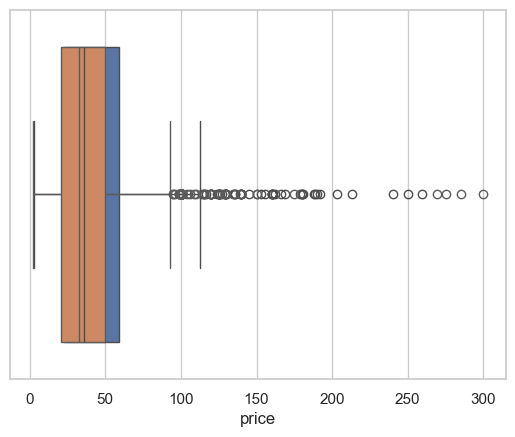

In [45]:
sns.boxplot(x=mens_perfume_df['price'])
sns.boxplot(x=womens_perfume_df['price'])


In [46]:
mens_perfume_df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)


brand
Versace          96519.0
Davidoff         54944.0
Calvin Klein     43520.0
Azzaro           38305.0
Armaf            24282.0
Kenneth Cole     23716.0
Paco Rabanne     21579.0
Liz Claiborne    21341.0
Burberry         19286.0
2nd To None      18882.0
Name: sold, dtype: float64

<Axes: >

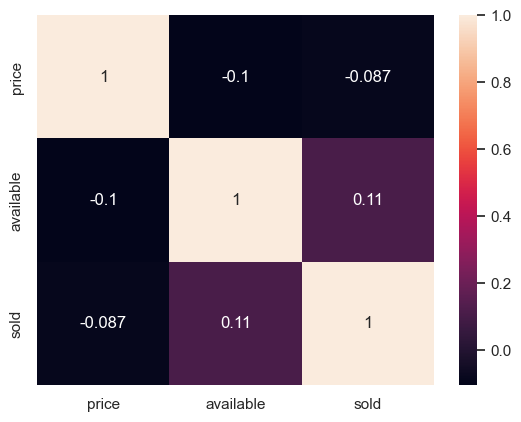

In [47]:
sns.heatmap(mens_perfume_df[['price', 'available', 'sold']].corr(), annot=True)


In [48]:
fig = px.bar(mens_perfume_df.sort_values(by='sold', ascending=False).head(10),
             x='title', y='sold', title='Top 10 Selling Men’s Perfumes')
fig.show()


<Axes: xlabel='available', ylabel='sold'>

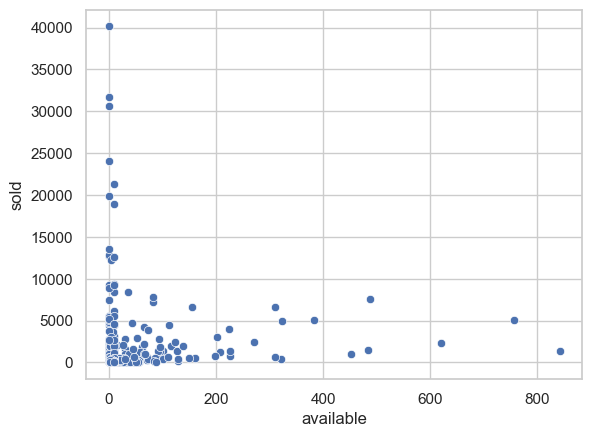

In [49]:
sns.scatterplot(x='available', y='sold', data=mens_perfume_df)


In [50]:
# Compare average prices
avg_price_men = mens_perfume_df['price'].mean()
avg_price_women = womens_perfume_df['price'].mean()
print(f"Average price of men's perfumes: ${avg_price_men:.2f}")
print(f"Average price of women's perfumes: ${avg_price_women:.2f}")

Average price of men's perfumes: $46.48
Average price of women's perfumes: $39.81


In [51]:
# Compare total sales
total_sales_men = mens_perfume_df['sold'].sum()
total_sales_women = womens_perfume_df['sold'].sum()
print(f"Total sales of men's perfumes: {total_sales_men}")
print(f"Total sales of women's perfumes: {total_sales_women}")

Total sales of men's perfumes: 704481.0
Total sales of women's perfumes: 489343.0


In [52]:
# Compare brand representation
mens_brands = mens_perfume_df['brand'].nunique()
womens_brands = womens_perfume_df['brand'].nunique()
print(f"Number of unique brands in men's perfumes: {mens_brands}")
print(f"Number of unique brands in women's perfumes: {womens_brands}")

Number of unique brands in men's perfumes: 246
Number of unique brands in women's perfumes: 247


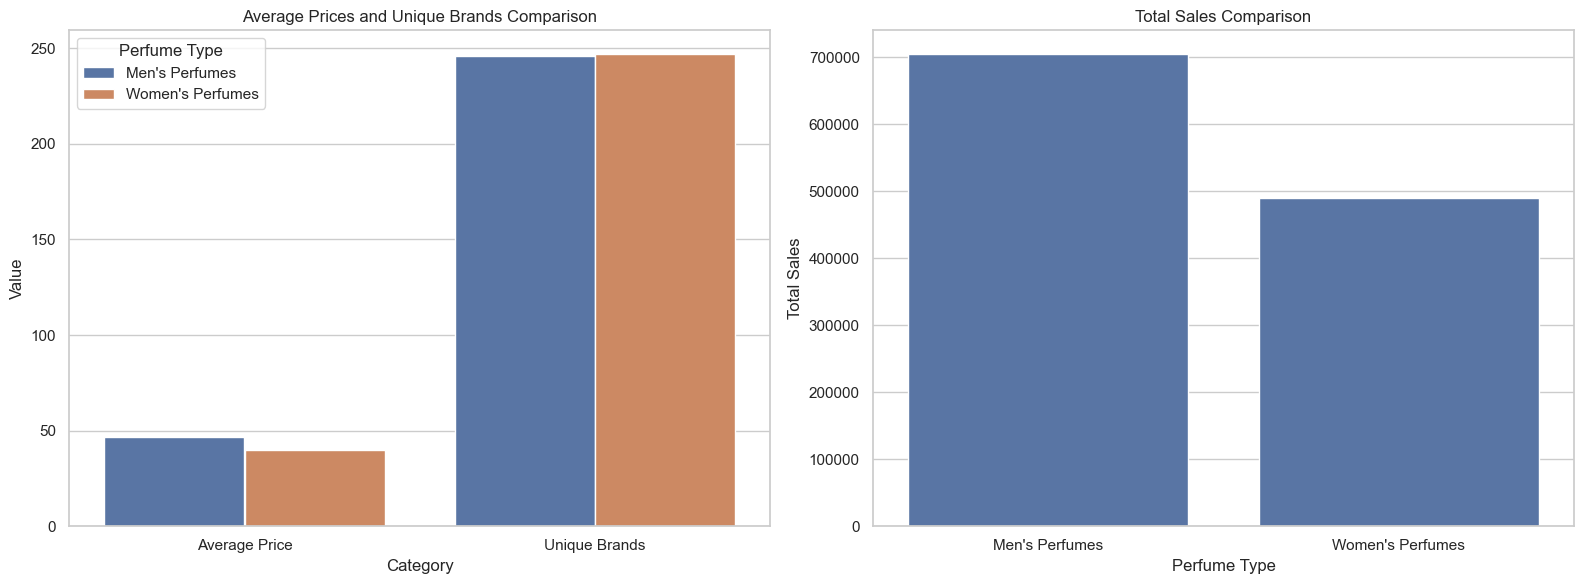

In [53]:
# Create data for visualization
comparison_data = {
    'Category': ['Average Price', 'Unique Brands'],
    "Men's Perfumes": [avg_price_men, mens_brands],
    "Women's Perfumes": [avg_price_women, womens_brands]
}

comparison_df = pd.DataFrame(comparison_data)

# Melt the dataframe for easier plotting with seaborn
melted_comparison_df = comparison_df.melt(id_vars='Category', var_name='Perfume Type', value_name='Value')

# Plot the average prices and unique brands
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot average prices and unique brands
sns.barplot(x='Category', y='Value', hue='Perfume Type', data=melted_comparison_df, ax=ax[0])
ax[0].set_title('Average Prices and Unique Brands Comparison')
ax[0].set_ylabel('Value')
ax[0].set_xlabel('Category')

# Plot total sales
total_sales_data = {
    'Perfume Type': ["Men's Perfumes", "Women's Perfumes"],
    'Total Sales': [total_sales_men, total_sales_women]
}
total_sales_df = pd.DataFrame(total_sales_data)

sns.barplot(x='Perfume Type', y='Total Sales', data=total_sales_df, ax=ax[1])
ax[1].set_title('Total Sales Comparison')
ax[1].set_ylabel('Total Sales')
ax[1].set_xlabel('Perfume Type')

# Show the plot
plt.tight_layout()
plt.show()

# Section 2: Brand Popularity and Pricing Strategies
In this section, we will investigate the popularity of different perfume brands and analyze their pricing strategies. By examining the sales data and price points of various brands, we can identify the most successful brands and gain insights into their pricing patterns. This analysis will help us understand the relationship between brand popularity and pricing, and provide valuable information for businesses to optimize their pricing strategies.

Top 10 Brands by Sales:
               Brand  Total Sales  Average Price
372          Versace     128077.0      36.890755
74      Calvin Klein      91620.0      24.896061
101         Davidoff      60289.0      24.415455
44            Azzaro      38305.0      42.802000
64          Burberry      38001.0      40.329091
233    Liz Claiborne      29170.0      23.651818
106  Dolce & Gabbana      28570.0      39.268696
32             Armaf      27120.0      39.587143
212     Kenneth Cole      24636.0      22.441250
293     Paco Rabanne      23506.0      59.397234


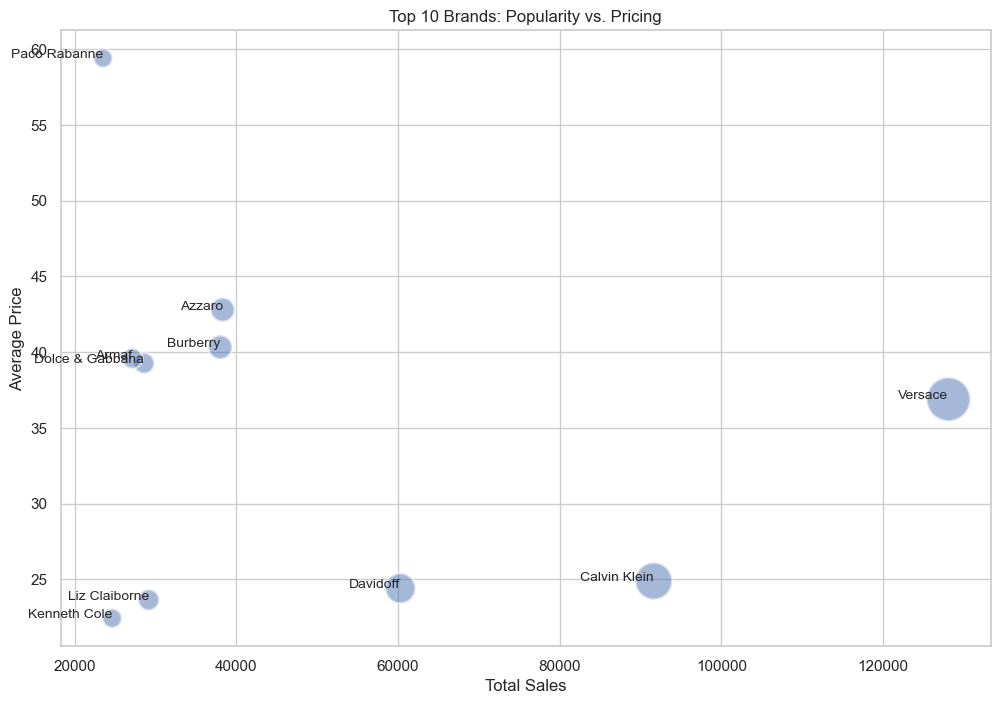

In [54]:
# Combine men's and women's perfume datasets
perfume_df = pd.concat([mens_perfume_df, womens_perfume_df])

# Calculate sales and average price for each brand
brand_sales = perfume_df.groupby('brand')['sold'].sum().reset_index()
brand_avg_price = perfume_df.groupby('brand')['price'].mean().reset_index()

# Merge sales and average price data
brand_analysis_df = pd.merge(brand_sales, brand_avg_price, on='brand')
brand_analysis_df.columns = ['Brand', 'Total Sales', 'Average Price']

# Sort brands by total sales in descending order
brand_analysis_df = brand_analysis_df.sort_values('Total Sales', ascending=False)

# Display the top 10 brands by sales
top_brands = brand_analysis_df.head(10)
print("Top 10 Brands by Sales:")
print(top_brands)

# Visualize the relationship between brand popularity and pricing with a bubble chart
plt.figure(figsize=(12, 8))
bubble_size = top_brands['Total Sales'] / top_brands['Total Sales'].max() * 1000  # Adjust bubble size for visibility

plt.scatter(top_brands['Total Sales'], top_brands['Average Price'], s=bubble_size, alpha=0.5, edgecolors="w", linewidth=2)

# Add labels to each bubble
for i in range(len(top_brands)):
    plt.text(top_brands['Total Sales'].iloc[i], top_brands['Average Price'].iloc[i], top_brands['Brand'].iloc[i], fontsize=10, ha='right')

plt.xlabel('Total Sales')
plt.ylabel('Average Price')
plt.title('Top 10 Brands: Popularity vs. Pricing')
plt.grid(True)
plt.show()


# Section 3: Geographical Analysis of Perfume Sales
In this section, we will explore the geographical distribution of perfume listings and sales. By analyzing the item location data, we can identify regions with high demand, uncover regional preferences, and discover potential market opportunities. This analysis will provide valuable insights into the spatial dynamics of the perfume market and help businesses optimize their distribution and marketing strategies based on regional demand.


In [66]:
import plotly.express as px

# Extract country from itemLocation
perfume_df['Country'] = perfume_df['itemLocation'].str.split(',').str[-1].str.strip()

# Manual fixes to standardize country names
country_corrections = {
    'USA': 'United States',
    'U.S.A.': 'United States',
    'US': 'United States',
    'U.S.': 'United States',
    'United States of America': 'United States',
    'Hong Kong': 'Hong Kong',
    'New Jersey': 'United States',
    'Canada': 'Canada',
    'China': 'China'
    # Add more if needed based on unique values
}

perfume_df['Country'] = perfume_df['Country'].replace(country_corrections)

# Group by country and calculate total sales
country_sales = perfume_df.groupby('Country')['sold'].sum().reset_index()

# Sort countries by total sales
country_sales = country_sales.sort_values('sold', ascending=False)

# Preview cleaned countries
print("Countries found:\n", country_sales['Country'].unique())

# Create the choropleth map
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='sold',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Geographical Distribution of Perfume Sales'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()



Countries found:
 ['United States' 'Hong Kong' 'China' 'Canada' 'India' 'Taiwan' 'Brazil'
 'Bulgaria' 'Poland' 'Israel' 'Portugal' 'Japan' 'Pakistan'
 'Estados Unidos']


# Section 4: Availability and Sales Correlation
In this section, we will examine the relationship between perfume availability and sales. By analyzing the data on available quantities and sold quantities, we can determine if higher availability leads to increased sales or if scarcity drives demand. This analysis will provide insights into inventory management strategies and help businesses optimize their stock levels to maximize sales.

Correlation between availability and sales: 0.28


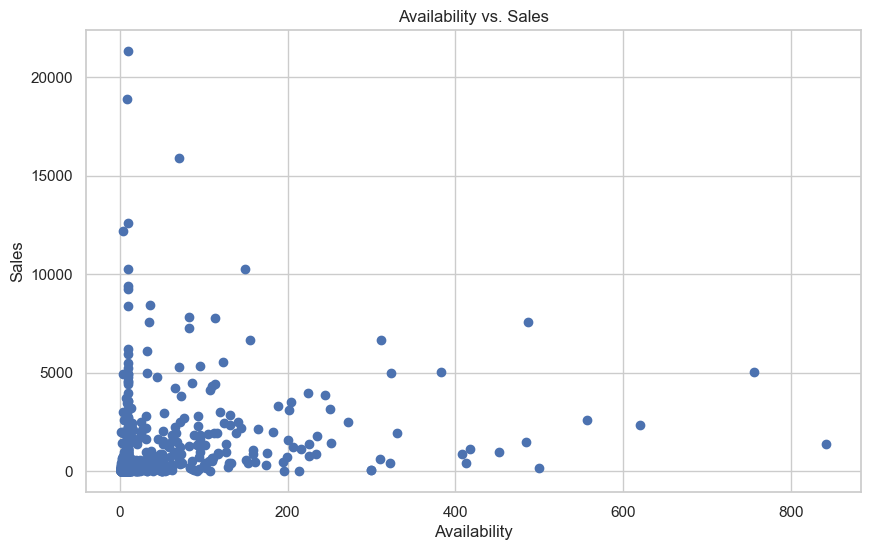

In [ ]:
# Calculate the correlation between availability and sales
correlation = perfume_df['available'].corr(perfume_df['sold'])
print(f"Correlation between availability and sales: {correlation:.2f}")

# Visualize the relationship between availability and sales
plt.figure(figsize=(10, 6))
plt.scatter(perfume_df['available'], perfume_df['sold'])
plt.xlabel('Availability')
plt.ylabel('Sales')
plt.title('Availability vs. Sales')
plt.show()

# Section 5: Perfume Type Preferences
In this section, we will analyze consumer preferences for different perfume types (e.g., Eau de Parfum, Eau de Toilette) and how they vary across brands, price points, and customer segments. By examining the sales data and perfume types, we can gain insights into customer preferences and identify popular perfume types within specific brands or price ranges. This analysis will help businesses tailor their product offerings and marketing strategies to meet customer demands.

Perfume Types by Sales:
                                             type      sold
53                                Eau de Toilette  733114.0
45                                  Eau de Parfum  268725.0
43                                 Eau de Cologne   51536.0
52                                 Eau de Perfume   22917.0
51                                 Eau de Parfume   21211.0
..                                            ...       ...
2                                            3 Pc       2.0
92                              Perfume Gift Sets       1.0
114  ~ BODY FIRM ADVANCED BODY REPAIR TREATMENT ~       1.0
24                                  Discovery Set       0.0
73                                  Fragrance Oil       0.0

[116 rows x 2 columns]


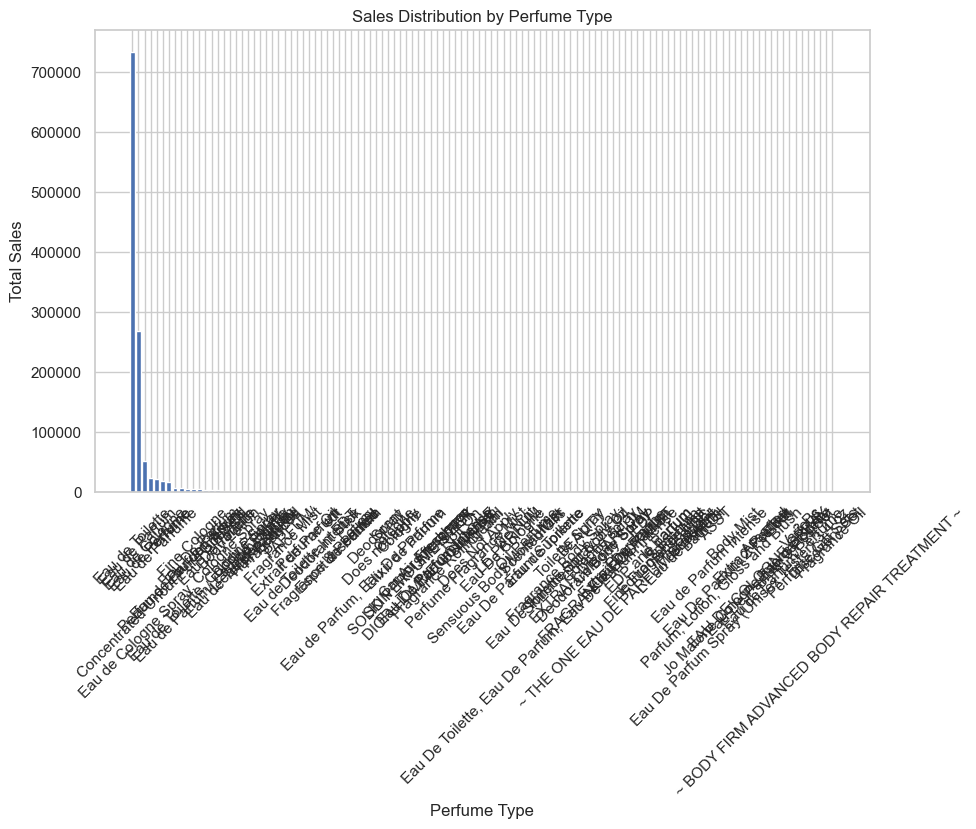

Perfume Type Preferences for 2nd To None:
         brand                              type     sold
0  2nd To None  Concentrated Uncut Pure Body Oil  18882.0

Perfume Type Preferences for AERIN:
   brand           type  sold
1  AERIN  Eau de Parfum  50.0

Perfume Type Preferences for ALFRED SUNG:
         brand             type    sold
3  ALFRED SUNG  Eau de Toilette  5627.0
2  ALFRED SUNG    Eau de Parfum  1516.0

Perfume Type Preferences for ALT Fragrances:
            brand               type   sold
4  ALT Fragrances  Extrait de Parfum  686.0

Perfume Type Preferences for AS  SHOWN:
       brand             type  sold
5  AS  SHOWN  Eau de Toilette  12.0



In [ ]:
# Group by perfume type and calculate total sales
type_sales = perfume_df.groupby('type')['sold'].sum().reset_index()

# Sort perfume types by total sales in descending order
type_sales = type_sales.sort_values('sold', ascending=False)

# Display the perfume types by sales
print("Perfume Types by Sales:")
print(type_sales)

# Visualize the sales distribution by perfume type
plt.figure(figsize=(10, 6))
plt.bar(type_sales['type'], type_sales['sold'])
plt.xlabel('Perfume Type')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Perfume Type')
plt.xticks(rotation=45)
plt.show()

# Analyze perfume type preferences by brand
brand_type_sales = perfume_df.groupby(['brand', 'type'])['sold'].sum().reset_index()
brand_type_sales = brand_type_sales.sort_values(['brand', 'sold'], ascending=[True, False])

# Display perfume type preferences by brand for the top 5 brands
top_brands = brand_type_sales['brand'].unique()[:5]
for brand in top_brands:
    print(f"Perfume Type Preferences for {brand}:")
    print(brand_type_sales[brand_type_sales['brand'] == brand])
    print()

We did analysis of the Perfume E-Commerce Dataset 2024, covering comparative insights between men's and women's perfume markets, brand popularity and pricing strategies, geographical trends, availability and sales correlation, and perfume type preferences.
**Please Tell me in comments if you want this notebook updated in any way!**